<a href="https://colab.research.google.com/github/njoshi94/RecipeWords/blob/master/RecipeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
After becoming vegan, gluten free, and refined sugar free, I started reading a lot of online recipes and noticed very long, and mostly irrelevant, introductions. Several friends who were vegan, told me that vegan recipes always have long introductions, and I wanted to see if there was a relationship between dietary restrictions ('None', 'Gluten Free', 'Vegan', 'Refined Sugar Free') and percentage of recipes dedicated to introductions as well as total words of articles. 

# Hypothesis:

The more dietary restrictions a recipe has, the longer the introduction and total word count will be.

# Data Collection:
To maintain consistency, I searched for 30 recipes and would search with no additional criteria, 'Gluten Free', 'Vegan', or 'Refined Sugar Free'. To avoid natural bias, I chose the recipes by working through this list: https://www.foodnetwork.com/recipes/photos/foodnetwork-top-50-most-saved-recipes.

After entering the search criteria, I would click on the first usable website. Certain websites remove all introductions by default, and I excluded these for obvious reasons. I then calculated the amount of words for the introduction, the total amount of words (Introduction + Recipe) and calculated the percentage of the recipe dedicated to the introduction. 

Dietary restrictions were determined by the creators of each recipe, and recipes could have multiple tags. 

When collecting data, I excluded counting words for the following categories:

*   Substitutions / instructions for cooking methods - I felt like these belonged in a third category, and since not every article included them, I avoided them for consistency 
*   Author Introductions - certain websites include these by default, and others did not, so it did not feel fair to include them
* Disclaimers - things like mentioning the article has affiliate links were not counted 



Note- The Pip installs are only needed in the following scenario:

*   TensorFlow version is 2.2.0
*   The runtime type is GPU 



In [0]:
#!pip install tensorflow-gpu 
#!pip install tf-nightly
import tensorflow as tf
tf.__version__

'2.2.0'

In [0]:
#Importing all relevant libraries 
import pandas as pd 
import numpy as np
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

For the below section, 'RecipesData.xlsx' needs to be uploaded. 

The document can be found here: www.github.com/njoshi94/RecipeWords

In [0]:

#Importing Data 
filename = 'RecipesData.xlsx'
df = pd.read_excel(filename)

#Splitting the different restrictions into a list 
df['Restrictions'] = df['Restrictions'].str.split(', ')

#Splitting the data into test and training 
X = df.drop(['Food', 'Url', 'Recipe', 'Extra Words',
             'Restrictions', 'None', 'Gluten Free', 'Vegan', 'Refined Sugar Free'], axis = 1)
y = df.drop(['Food', 'Url', 'Recipe', 'Total Words', 'Extra Words', 'Percent', 
             'Restrictions'], axis = 1)

X = X.to_numpy()
X = X[...,np.newaxis]
y = y.to_numpy()

#test_size split to have 100 test and 20 train values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/6, random_state = 0)

In [0]:
X_train.shape

(100, 2, 1)

In [0]:
y_train.shape

(100, 4)

In [0]:

#Bulding the Model
#Creating the first layer 
model = Sequential()
model.add(Conv1D(8,1, activation = 'relu', input_shape = X_train[0].shape  ))
model.add(BatchNormalization())
model.add(MaxPool1D())
model.add(Dropout(0.4))

#Adding second layer
model.add(Conv1D(16, 1, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#Adding third layer
model.add(Conv1D(32, 1, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#Adding fourth layer
model.add(Conv1D(64, 1, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(4, activation = 'sigmoid'))

model.summary() 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 8)              16        
_________________________________________________________________
batch_normalization (BatchNo (None, 2, 8)              32        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 8)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 8)              0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 16)             144       
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 16)             64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 16)             0

In [0]:
#Compiling and running the model 
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 100, batch_size = 5, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/100
20/20 [==============================] - 0s 20ms/step - loss: 0.9570 - accuracy: 0.2500 - val_loss: 0.6736 - val_accuracy: 0.2500
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 1.0354 - accuracy: 0.2000 - val_loss: 0.6747 - val_accuracy: 0.1500
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.9463 - accuracy: 0.2500 - val_loss: 0.6756 - val_accuracy: 0.1500
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.9429 - accuracy: 0.2800 - val_loss: 0.6711 - val_accuracy: 0.1500
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 0.8682 - accuracy: 0.2800 - val_loss: 0.6677 - val_accuracy: 0.1500
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 0.9426 - accuracy: 0.2000 - val_loss: 0.6631 - val_accuracy: 0.1500
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.8737 - accuracy: 0.2900 - val_loss: 0.6552 - val_accuracy: 0.1500
Epoch 8/100


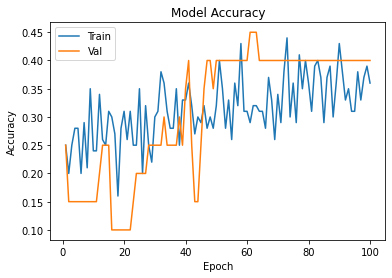

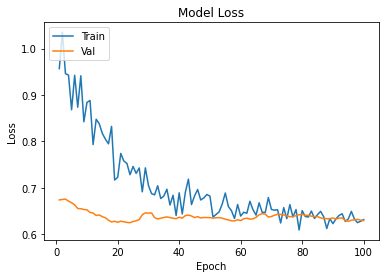

In [0]:
#Plots showing results

#Training and validation accuracy values 
epoch_range = range(1,101)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

#Training and validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()


# Conclusion

Looking at the plots above, we can see that the model had less than 50% validataion accucracy. Therefore, there is no correlation between dietary restrictions and the length of the introduction and total word count.

Validation Loss being lower than Training Loss for the majority of epochs, in the second plot, also says that the model is not overfitting and we can trust the results of the model. 